<a href="https://colab.research.google.com/github/bc0de0/LinearRegression/blob/main/NewsClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:

from google.colab import files
 
 
uploaded = files.upload()

Saving News.csv to News.csv


In [16]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

The data=set News catagorizes individual news into appropriate catagories based on the content of the data-set.
We will be creating a predictive model based on a appropriate classification algorithm to predict a new news article in an appropriate catagory.

In [17]:
news = pd.read_csv("News.csv")
news.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


Above is the head of the dataset. Here we have 3 columns only Article ID, Text and catagory.

In [18]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  799 non-null    int64 
 1   Text       799 non-null    object
 2   Category   799 non-null    object
dtypes: int64(1), object(2)
memory usage: 18.9+ KB


In [19]:
news.describe()

,ArticleId
count,799.000000
mean,1102.947434
std,639.844824
min,2.000000
25%,531.500000
50%,1088.000000
75%,1640.000000
max,2224.000000


From the Describe function it can be seen that the dataset has 799 rows 

In [20]:
news.shape

(799, 3)

In [23]:
news['Category'].value_counts()

sport            191
business         187
tech             152
entertainment    140
politics         129
Name: Category, dtype: int64

This shows the total catagories available for the dataset, Here we have 5 catagories - sport, business, tech, entertainment and politics

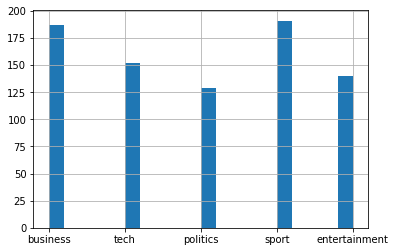

In [21]:
news.Category.hist(bins=20)

As can be seen from the histogram We have about 185 articles for Business, around 150 for tech, 125 for politics, 195 for sport and 140 for entertainment

With a even mix and match of the above data, we can now proceed to create two datasets a test dataset consisting of text articles and train it with the catagories data members

now we convert the news catagories into catagorical values

In [22]:
index_category = news['Category'].unique()
print(index_category)

['business' 'tech' 'politics' 'sport' 'entertainment']


We will now create a new column to give numeric values to the catagories

In [23]:
news['CategoryId'] = news['Category'].factorize()[0]
news.head()

,ArticleId,Text,Category,CategoryId
0,1833,worldcom ex-boss launches defence lawyers defe...,business,0
1,154,german business confidence slides german busin...,business,0
2,1101,bbc poll indicates economic gloom citizens in ...,business,0
3,1976,lifestyle governs mobile choice faster bett...,tech,1
4,917,enron bosses in $168m payout eighteen former e...,business,0


now we create a new dataframe with the Category and Category Id attributes for begining our ML model

In [24]:
news_catagory = news[['Category', 'CategoryId']].drop_duplicates().sort_values('CategoryId')
news_catagory.head()

,Category,CategoryId
0,business,0
3,tech,1
5,politics,2
6,sport,3
7,entertainment,4


Following is a pie chart representation fo the catagories with respective articles

In [ ]:
fig = plt.figure(figsize = (5,5))
colors = ["lightgreen"]
business = news[news['CategoryId'] == 0 ]
tech = news[news['CategoryId'] == 1 ]
politics = news[news['CategoryId'] == 2]
sport = news[news['CategoryId'] == 3]
entertainment = news[news['CategoryId'] == 4]
count = [business['CategoryId'].count(), tech['CategoryId'].count(), politics['CategoryId'].count(), sport['CategoryId'].count(), entertainment['CategoryId'].count()]
pie = plt.pie(count, labels = ['business', 'tech', 'politics', 'sport', 'entertainment'],
              autopct = "%1.1f%%",
              shadow = True,
              colors = colors,
              startangle = 45,
              explode = (0.1, 0.1, 0.1, 0.1,0.1))

Now we will visualize the catagories related specific words using Word Cloud

In [27]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

from wordcloud import WordCloud
stop = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [28]:
business = news[news['CategoryId'] == 0]
business = business['Text']

tech = news[news['CategoryId'] == 1]
tech = tech['Text']

politics = news[news['CategoryId'] == 2]
politics = politics['Text']

sport = news[news['CategoryId'] == 3]
sport = sport['Text']

entertainment = news[news['CategoryId'] == 4]
entertainment = entertainment['Text']




business related words:


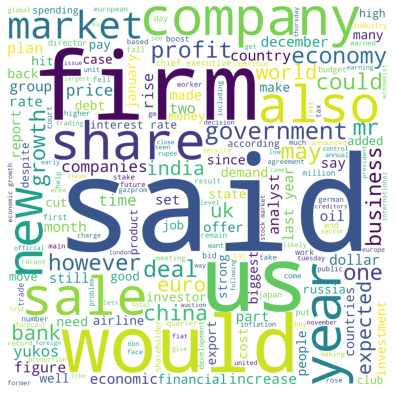

tech related words:


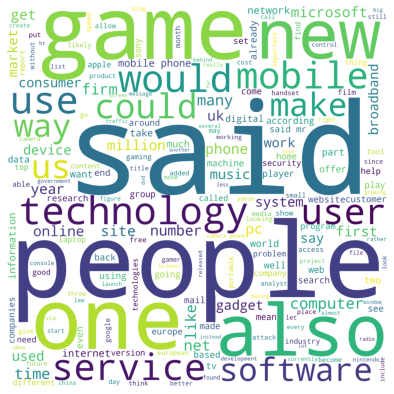

politics related words:


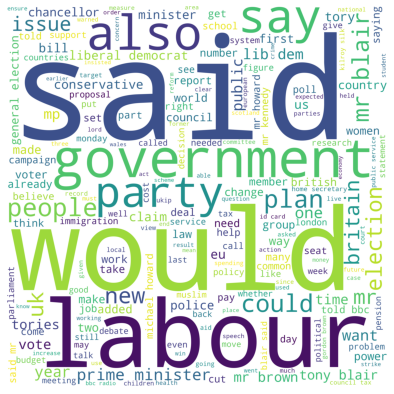

sport related words:


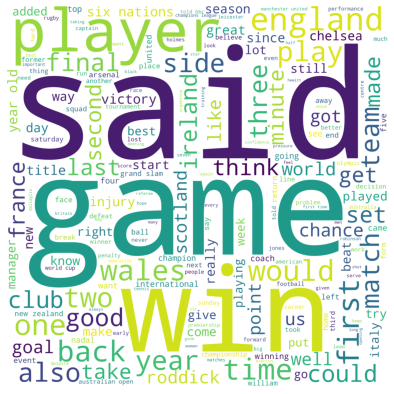

entertainment related words:


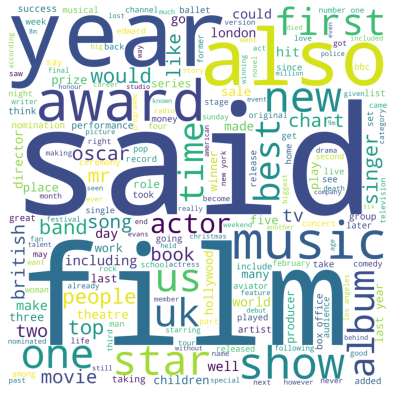

In [29]:
def wordcloud_draw(news, color = 'white'):
  words = ' '.join(news)
  cleaned_word = ' '.join([word for word in words.split() if (word != 'news' and word != 'text')])
  wordcloud = WordCloud(stopwords = stop, background_color = color, width = 2500, height = 2500).generate(cleaned_word)

  plt.figure(1, figsize = (10,7))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.show()

print("business related words:")
wordcloud_draw(business, 'white')

print("tech related words:")
wordcloud_draw(tech, 'white')

print("politics related words:")
wordcloud_draw(politics, 'white')

print("sport related words:")
wordcloud_draw(sport, 'white')

print("entertainment related words:")
wordcloud_draw(entertainment, 'white')
    



As can be seen above we have now classified the words related to the 5 catagories as shown in the the word map.

now we can remove all the stopwords with the following function:



In [30]:
import tensorflow as tf
nltk.download('punkt')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [31]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')  
lemmatizer = WordNetLemmatizer()




[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [32]:
from nltk.tokenize import word_tokenize
def remove_stopwords(text):
  stop_words = set(stopwords.words('english'))
  words = word_tokenize(text)
  return [x for x in words if x not in stop_words]

def lemmatize_word(text):
  wordnet = WordNetLemmatizer()
  return " ".join([wordnet.lemmatize(word) for word in text])

In [33]:
news['Text'] = news['Text'].apply(lemmatize_word)
news['Text'][1]

'g e r m a n   b u s i n e s s   c o n f i d e n c e   s l i d e s   g e r m a n   b u s i n e s s   c o n f i d e n c e   f e l l   i n   f e b r u a r y   k n o c k i n g   h o p e s   o f   a   s p e e d y   r e c o v e r y   i n   e u r o p e   s   l a r g e s t   e c o n o m y .     m u n i c h - b a s e d   r e s e a r c h   i n s t i t u t e   i f o   s a i d   t h a t   i t s   c o n f i d e n c e   i n d e x   f e l l   t o   9 5 . 5   i n   f e b r u a r y   f r o m   9 7 . 5   i n   j a n u a r y     i t s   f i r s t   d e c l i n e   i n   t h r e e   m o n t h s .   t h e   s t u d y   f o u n d   t h a t   t h e   o u t l o o k   i n   b o t h   t h e   m a n u f a c t u r i n g   a n d   r e t a i l   s e c t o r s   h a d   w o r s e n e d .   o b s e r v e r s   h a d   b e e n   h o p i n g   t h a t   a   m o r e   c o n f i d e n t   b u s i n e s s   s e c t o r   w o u l d   s i g n a l   t h a t   e c o n o m i c   a c t i v i t y   w a s   p i c k i n g   u p .

In [34]:
news


,ArticleId,Text,Category,CategoryId
0,1833,w o r l d c o m e x - b o s s l a u n c h ...,business,0
1,154,g e r m a n b u s i n e s s c o n f i d e ...,business,0
2,1101,b b c p o l l i n d i c a t e s e c o n ...,business,0
3,1976,l i f e s t y l e g o v e r n s m o b i ...,tech,1
4,917,e n r o n b o s s e s i n $ 1 6 8 m p ...,business,0
...,...,...,...,...
794,1292,m a n u t d s t r o l l t o c u p w ...,sport,3
795,214,d o u g l a s s e t f o r i n d i a n ...,entertainment,4
796,1183,t h r e e d j s r e p l a c e p e e l ...,entertainment,4
797,1229,s a v v y s e a r c h e r s f a i l t o ...,tech,1


The above is our cleaned data-set and now we are all set to feed this to the ML model

In [35]:
x = news['Text']
y = news['CategoryId']

Apply the bag_of_arrays algorithm

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
x = np.array(news.iloc[:,0].values)
y = np.array(news.CategoryId.values)
cv = CountVectorizer(max_features = 5000)
x = cv.fit_transform(news.Text).toarray()
print("X.shape = ",x.shape)
print("y.shape = ",y.shape)

Train and split the dataset

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0, shuffle = True)
print(len(x_train))
print(len(x_test))

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn import svm, datasets
from sklearn.model_selection import cross_val_score
perform_list = [ ]

def run_model(model_name, est_c, est_pnlty):
  mdl = ''
  if model_name == 'Logistic Regression':
    mdl = LogisticRegression()
  elif model_name == 'Random Forest': 
    mdl = RandomForestClassifier(n_estimators=100 ,criterion='entropy' , random_state=0)
  elif model_name == 'Support Vector Classifer':
    mdl = SVC()
  elif model_name == 'Multinomial Naive Bayes':
    mdl = MultinomialNB(alpha=1.0,fit_prior=True)
  elif model_name == 'Decision Tree Classifier':
    mdl = DecisionTreeClassifier()
  elif model_name == 'K Nearest Neighbour':
    mdl = KNeighborsClassifier(n_neighbors=10 , metric= 'minkowski' , p = 4)
  elif model_name == 'Gaussian Naive Bayes':
    mdl = GaussianNB()

  oneVsRest = OneVsRestClassifier(mdl)
  oneVsRest.fit(x_train, y_train)
  y_pred = oneVsRest.predict(x_test)

  accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
  precision, recall, f1score, support = score(y_test, y_pred, average='micro')
  print(f'Test Accuracy Score of Basic {model_name}: % {accuracy}')
  print(f'Precision : {precision}')


now we can run our different models that we like

In [ ]:
run_model('Logistic Regression', est_c=None, est_pnlty=None)